# Credit Card Fraud Detection

## Objective
The goal of this project is to build a machine learning model
to detect fraudulent credit card transactions using historical data
pulled from MySQL.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/chilesh/Desktop/Data science/project 7/data/external/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## EDA & Plot

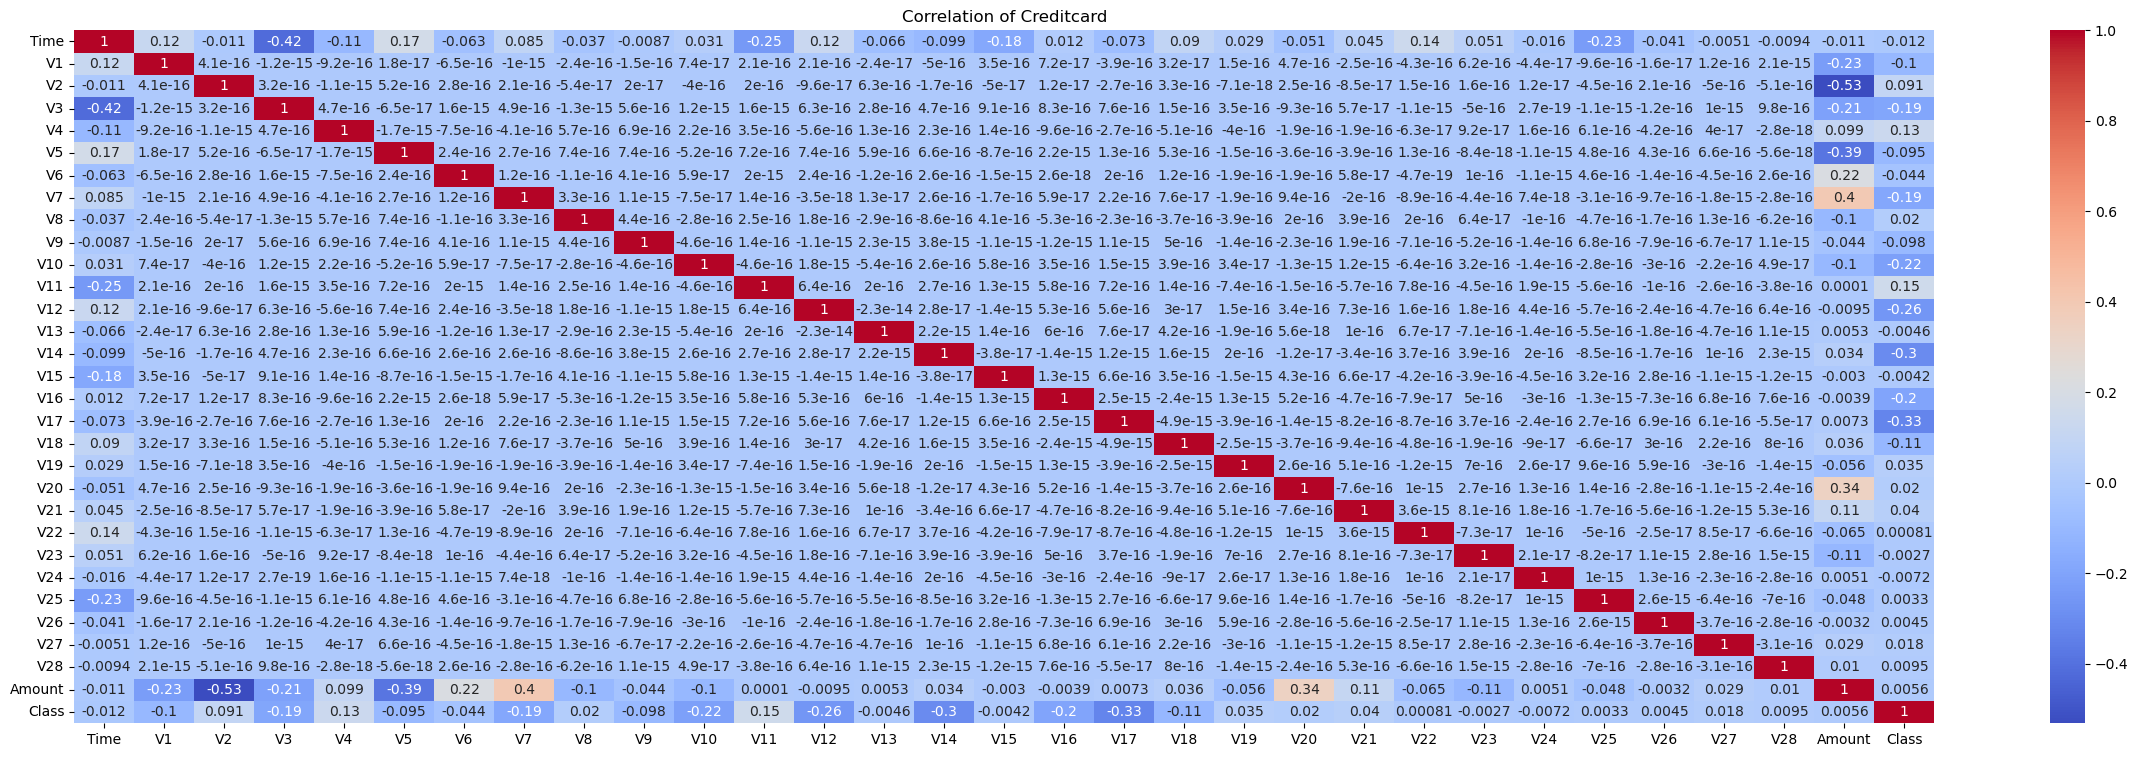

In [8]:
plt.figure(figsize=(30,9))
sns.heatmap(df.corr(),annot=True,cmap= 'coolwarm')
plt.title('Correlation of Creditcard')
plt.show()

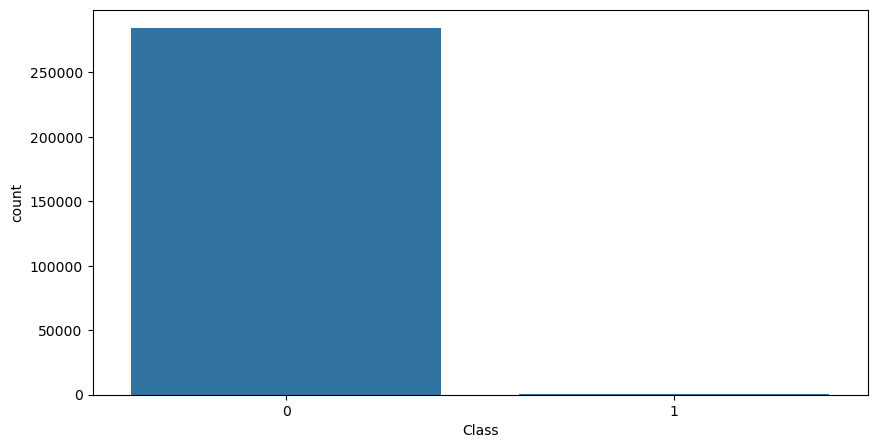

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Class',data=df)
plt.show()

In [10]:
fraud = df.Class.value_counts(normalize=True) * 100
fraud

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

The plot and fraud presentage is very much lesser where we can able to see the imbalance on the target data set

This my cause the problem while model building and predict always transcation is True we can't able to find the problem in model building 
it may lead to false Prediction

**Accuracy** it's  way going to lie



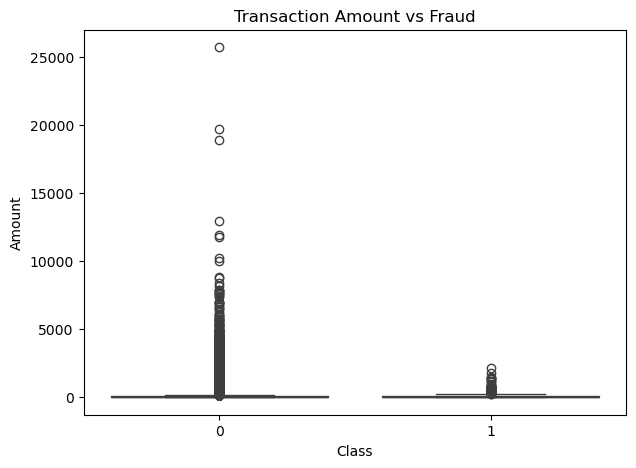

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()

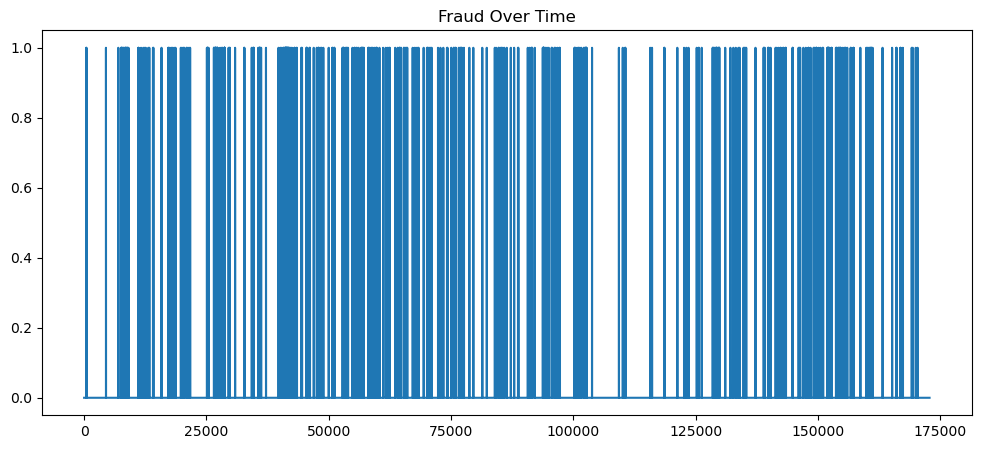

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df['Time'], df['Class'])
plt.title("Fraud Over Time")
plt.show()


In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Modelbuilding

In [14]:
X =  df.drop('Class',axis=1)
y = df['Class']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [17]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.transform(X_test)

In [18]:
lr_model = LogisticRegression(max_iter=1000,class_weight='balanced')
lr_model.fit(x_train_scaler,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred_lr = lr_model.predict(x_test_scaler)
y_prob_lr = lr_model.predict_proba(x_test_scaler)[:,1]

In [20]:
lr_model_pred_proba = pd.DataFrame({'predict':y_pred_lr,
             'Probability':y_prob_lr}
             )

lr_model_pred_proba.head()

,predict,Probability
0,0,0.005691
1,0,0.067552
2,0,0.000119
3,0,0.015131
4,1,0.945554


In [21]:
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score
confusion_matrix_lr = confusion_matrix(y_test,y_pred_lr)
print(classification_report(y_test,y_pred_lr))
print(roc_auc_score(y_test,y_prob_lr))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

0.9720834996210077


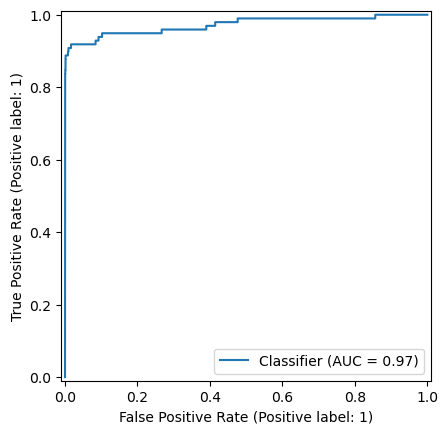

In [22]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_prob_lr)
plt.show()

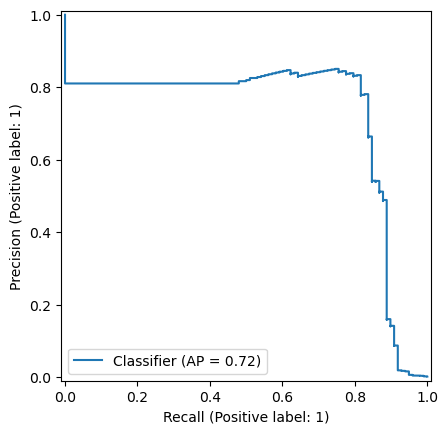

In [23]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_test, y_prob_lr)
plt.show()


**After Scaling features and training the a baseline LogisticRegression model, 
the result show High accuracy & high Recall for fraud.
Indicating strong ability to identify Fraudulent 
transaction,though with low Precision due to Class imbalance**

Accuracy = 98%

Recall (fraud) = 92%

Precision (fraud) = 6%

ROC-AUC = 97%

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_smote,y_train_smote = smote.fit_resample(x_train_scaler,y_train
                                                 )

In [25]:
pd.Series(y_train_smote).value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [26]:
rf_model = RandomForestClassifier(n_estimators=200,
                                  max_depth=10,
                                  random_state=42)
rf_model.fit(x_train_smote,y_train_smote)

y_pred_rf = rf_model.predict(x_test_scaler)
y_prob_rf= rf_model.predict_proba(x_test_scaler)[:,1]

In [27]:
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.86      0.57        98

    accuracy                           1.00     56962
   macro avg       0.71      0.93      0.79     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9820723344205436


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])
)

xgb.fit(x_train_scaler, y_train)

y_pred_xgb = xgb.predict(x_test_scaler)
y_prob_xgb = xgb.predict_proba(x_test_scaler)[:,1]


In [30]:
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.85      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9746229456892492


In [31]:
threshold = 0.3
y_pred_custom = (y_prob_xgb > threshold).astype(int)


In [32]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.85      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.92      0.84     56962
weighted avg       1.00      1.00      1.00     56962



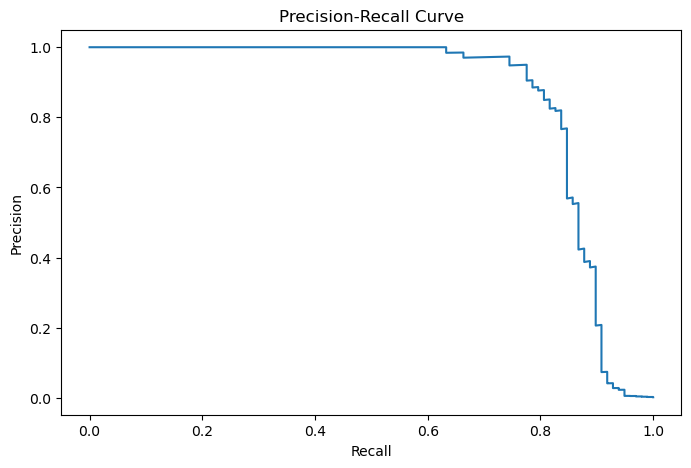

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, y_prob_xgb
)

plt.figure(figsize=(8,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)


## Plotting the all model evaluation ROC - Curve

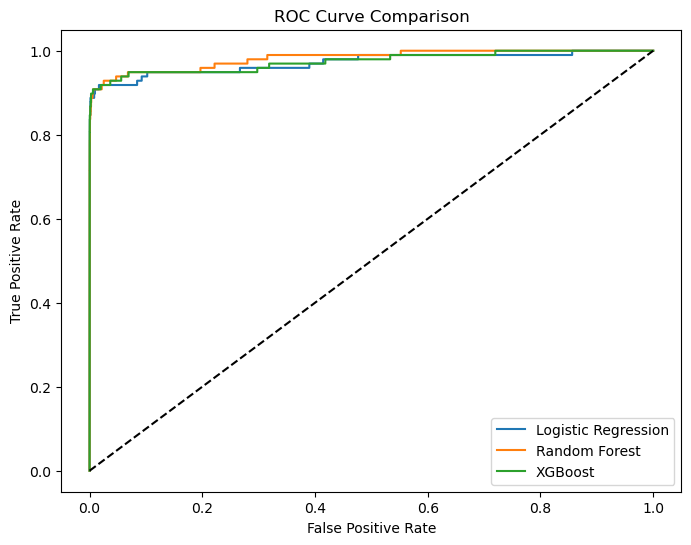

In [35]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [37]:
## Saved the model

In [36]:
import joblib

joblib.dump(xgb, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1]),
    use_label_encoder=False
)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [39]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,           # try 25 combinations
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(x_train_scaler, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:27:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...], ...}"
,n_iter,25
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [40]:
best_xgb = random_search.best_estimator_
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 4,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6}

In [41]:
y_pred_tuned = best_xgb.predict(x_test_scaler)
y_prob_tuned = best_xgb.predict_proba(x_test_scaler)[:,1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_tuned))
print("Tuned ROC-AUC:", roc_auc_score(y_test, y_prob_tuned))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.87      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.93      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Tuned ROC-AUC: 0.9784064089901576


In [42]:
joblib.dump(best_xgb, "fraud_xgboost_model.pkl")
joblib.dump(scaler, "fraud_scaler.pkl")

['fraud_scaler.pkl']

In [46]:
X.shape

(284807, 30)

In [48]:
df.shape

(284807, 31)